##### For the lifespan simulation we can consider two models: one tracks population of somatic and stem cells and another one simulates the system of somatic cells and mutants only.

##### Both models are based on following assumptions:

- From all hallmarks of aging we take into account only somatic mutations.
- Risk of death for somatic cells increases with the size of mutants population.
- Stem cells don't die, they just proliferate and mutate.
- The rate of somatic mutations is constant through the course of life.
- Regeneration of a tissue depends on the amount of alive cells (the less there are healthy cells, the more the tissue tries to regenerate).
- Cells are not supplied to an organ.
- There are 0 mutations at t = 0.

##### We can convert all these assumptions into a mathematical model the following way:

$$
    \frac{dX}{dt} = (rX + 2 \epsilon Y \Sigma(Y))(1 - \frac{X}{K}) - \alpha X - \mu(X, Y, t)
$$


$$
    \frac{dY}{dt} = \gamma Y(1 - \frac{Y}{M}) - \beta Y \Sigma(Y) - \epsilon Y
$$


$$
    \mu(X, Y, t) = \sigma \frac{(\alpha X t + \beta Y t)^{2}}{2} [1 - \frac{X + Y}{K + M}] 
$$


$$
    \Sigma(Y) = \frac{1}{1 + e^{-10(\frac{Y}{M} - 0.5)}}
$$

##### We can break this system by parts for better understanding:

- The part $rX(1 - \frac{X}{K})$ and $\gamma Y(1 - \frac{Y}{M})$ corresponds to the assumption of regeneration. Here r and $\gamma$ are rates of restoration and $K$ and $M$ are maximum volumes that somatic and stem cells can take.
- $\alpha X$ and $\beta Y$ represent constant mutation rates that decrease a healthy population by some proportion every time step.
- $\epsilon Y$ and $2\epsilon Y$ correspond to decrease of stem cells due to proliferation and corresponding increment of somatic cells.
- $\mu(X, Y, t)$ represents the part of the equation that shows mortality function of the system.
- $\Sigma(Y$ makes gradual increase of stem cells differentiation depending on their's population.

From all the parts the most complicated is mortality function $\mu(X, Y, t)$, so, we will investigate it deeper right now.

From the assumptions we consider that risk of death increases with the amount of mutants and the space that they occupy. We can express it like this:

$$
    \frac{dX}{dt d\hat X} = \sigma \hat X
$$

In this equation $\sigma$ is the coefficient that shows the strength of dependence and $\hat X$ is the mutant population.

We can also define the derivative of mutant population with respect to time as:

$$
    \frac{d \hat X}{dt} = \alpha X + \beta Y = M
$$

Now we can rewrite the equation:

$$
    \int \frac{dX}{dt d\hat X} d\hat X = \int \sigma \hat X d \hat X \\
$$

$$
     \frac{dX}{dt} = \sigma \frac{\hat X^{2}}{2}
$$

We can approximate $\hat X$ as $Mt$, so, we get:

$$
    \frac{dX}{dt} = \sigma \frac{M^{2}t^{2}}{2}
$$

$$
    \frac{dX}{dt} = \sigma \frac{(\alpha X t + \beta Y t)^{2}}{2}
$$

So, we get the dependence that we've been looking for. The only thing that we can add right now is the factor of volume that is left. We can assume that the more volume mutants take, the faster is the death rate and vice versa. So:

$$
    \frac{dX}{dt} = \sigma \frac{(\alpha X t + \beta Y t)^{2}}{2}[1 - \frac{X + Y}{K + M}]
$$

Now everything should be clear for two-equation system.

##### Finally, we can model populations for different organisms using two-eqs system. For this purpose we export *lifespan_class* module that contains all the necessary functions for the simulation. 

In [1]:
from lifespan_class import SomaticLS

# Model 2 inspection.

##### As an example of a Model 2 system we'll inspect liver. Currently, it's the best model object, as it seems to be the most stable system.

In [2]:
liver_2eq_conf = SomaticLS(organ = 'liver', equation='two', end_time=300)

We can inspect the object that is created by typing print(object)

In [3]:
print(liver_2eq_conf)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: liver,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model two equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


##### There are a lot of functions that are present in the module, but the most interesting ones are those which calculate lifespan based on a set of the parameters. Class method .plot_curves() calculates the lifespan and plots the population that we are interested in.

Life expectancy (years): 142.0
--------------------------------------------------
No resection


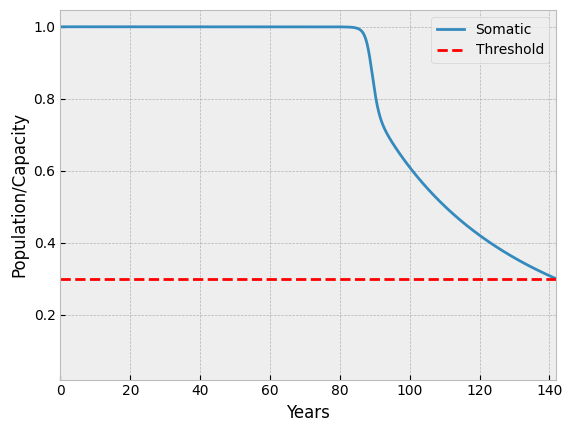

In [4]:
liver_2eq_conf.plot_curves()

##### We can also plot the mortality function if we are interested in it's behaviour. Here method .plot_curves() outputs lifespan, time of regeneration, time in years when the function takes a maximum value, maximum derivative and proportion of time when extremum is reached to total lifespan.

Life expectancy (years): 142.0
--------------------------------------------------
No resection


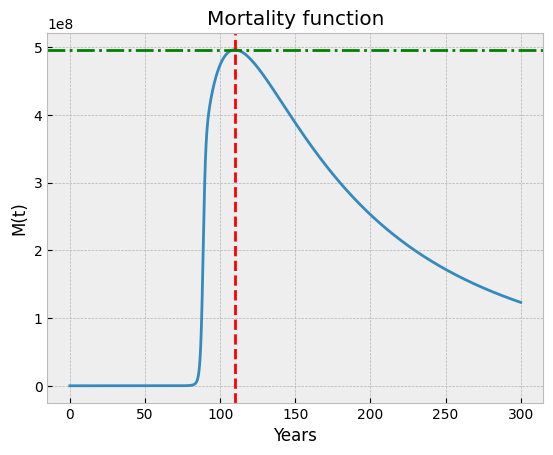

Max value: 495948093.0
Max moment: 110.0
Ratio of max to total lifespan in %: 77.3


In [5]:
liver_2eq_conf.plot_curves('Mortality function')

##### Sometimes it is useful to plot derivatives of a mortality function. It can be accessed by parameter `derivative`. Also, we can plot dependency on population instead of time.

Life expectancy (years): 142.0
--------------------------------------------------
No resection
Max derivative value: 268658.0
Max derivative moment: 89.0
Ratio of max derivative to total lifespan in %: 62.5
Max value: 495948093.0
Max moment: 110.0
Ratio of max to total lifespan in %: 77.3


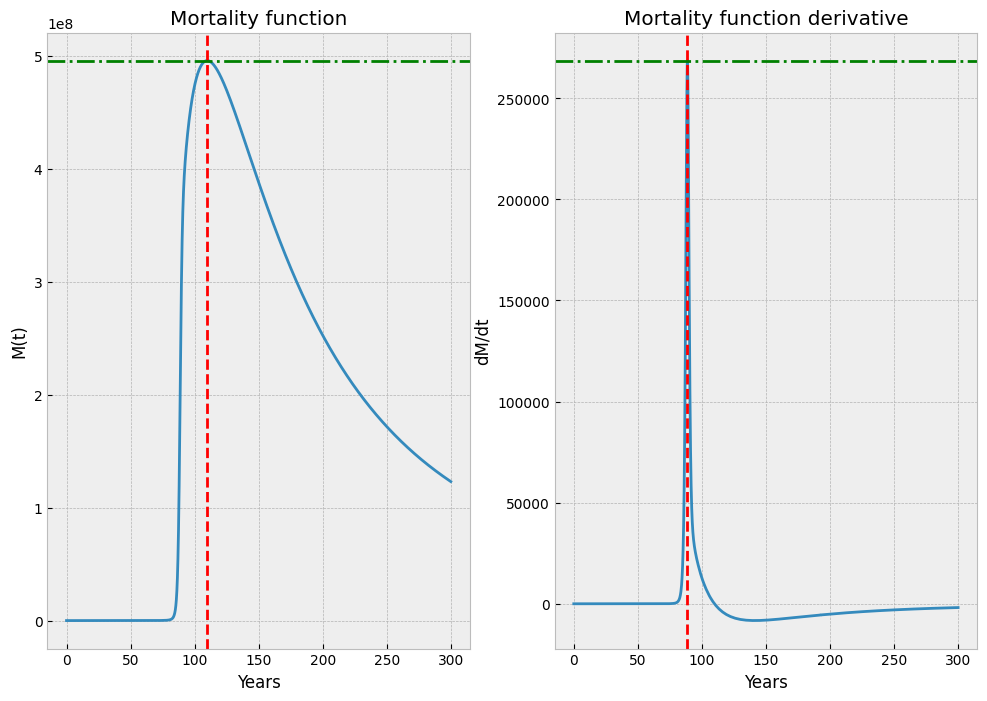

In [6]:
liver_2eq_conf.plot_curves('Mortality function', derivative=True)

Life expectancy (years): 142.0
--------------------------------------------------
No resection
--------------------------------------------------
--------------------------------------------------
Maximum value of mortality function derivative: 268658.0
--------------------------------------------------
Population value for mortality function derivative maximum (proportional to K): 0.91
--------------------------------------------------
Maximum value of mortality function: 495948093.0
--------------------------------------------------
Population value for mortality function maximum (proportional to K): 0.5


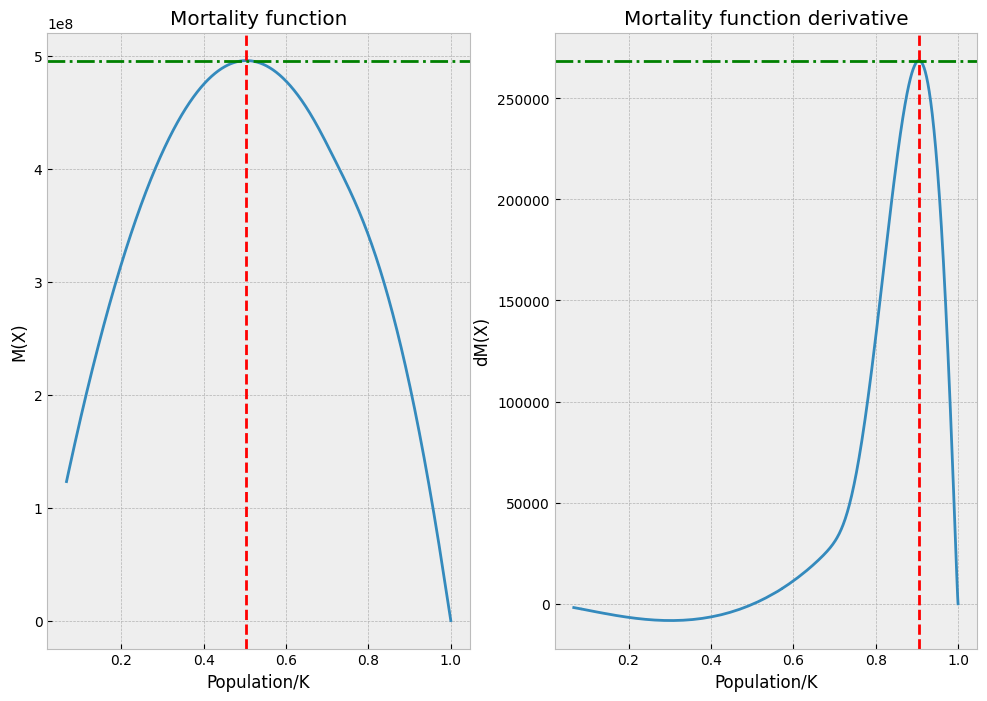

In [7]:
liver_2eq_conf.plot_curves('Mortality phase', derivative=True)

##### We can also try to perturb parameters of a system to see the reaction. Class method .variator() accepts parameters to vary and their upper,lower bounds and sampling frequency.

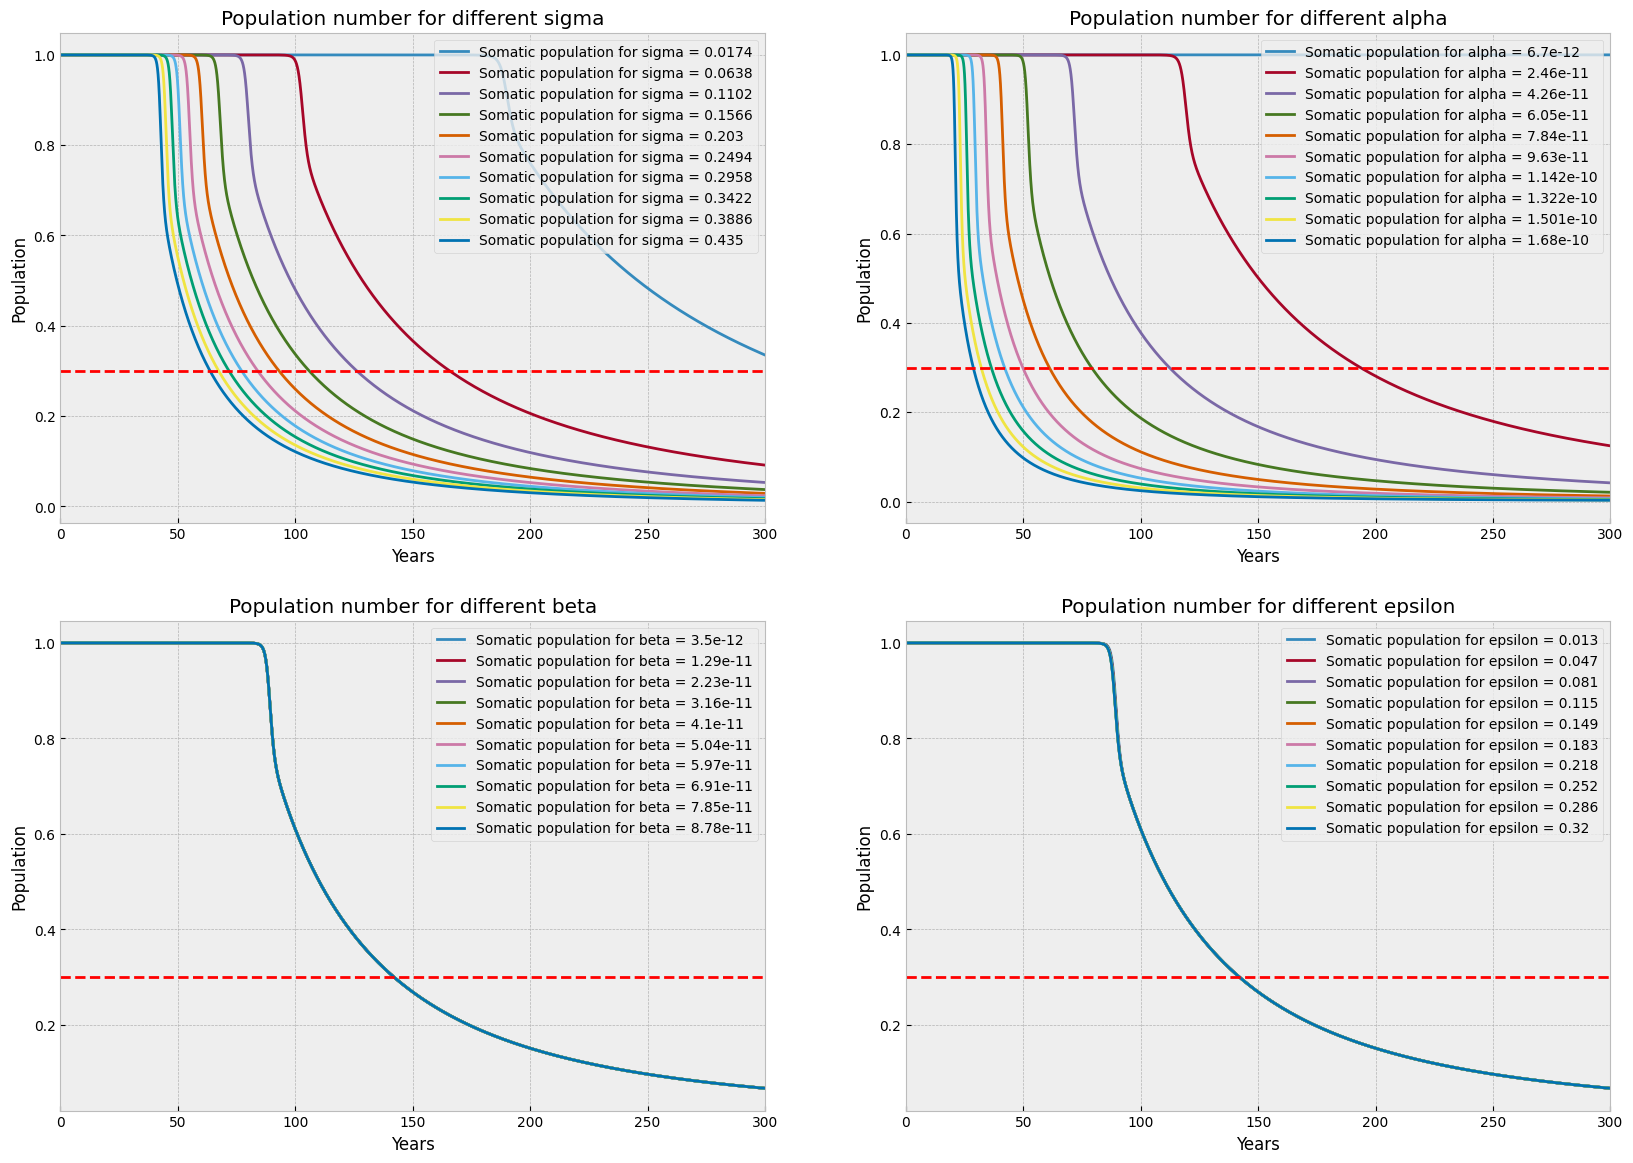

In [8]:
liver_2eq_conf.variator(sampling_freq=10)

##### From the plot above we can see that from a set of ($\alpha, \sigma, \epsilon$ and $\beta$) we have a clear dependency only for the first two parameters. This fact can be explained by too low value of $M$ compared to $K$. So, if we change something in stem cells equation, this won't really influence somatic cells population.

##### We can see it in the following example: for liver maximum number of stem cells is ~100 000 times lower than maximum number of somatic cells, so, their influence on the mortality function is quite low.

##### Also, variator function can perturb only one specific parameter: $\alpha, \sigma, r$. In this case the system also gives a resulting lifespan for the upper and lower bounds of the parameter.

Lower bound result:
Haven't died
--------------------------------------------------
No resection
----------------------------------------
Upper bound result:
Life expectancy (years): 29.0
--------------------------------------------------
No resection


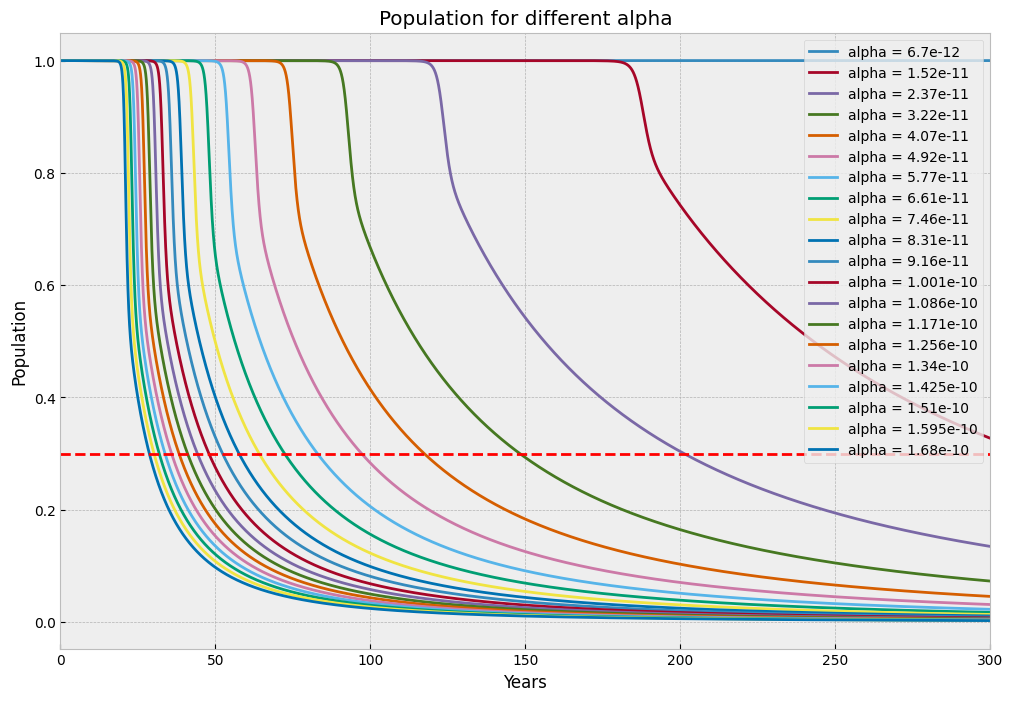

In [9]:
liver_2eq_conf.variator(sampling_freq=20, only_alpha=True)

##### We can see that, although the values of parameters are sampled as equidistant points, we can't see the same situation for curves. At some moment lifespans start to approach a limit that is given as an upper bound.

# Model 1 inspection

##### As it was shown in the above tests, $\beta$ and $\epsilon$ values don't play a big role for somatic cells population. This leads to a thought that maybe for such system there is no need for the second equation. If we go this way we have one-eq system that represents only somatic cells population:

$$
    \frac{dX}{dt} = rX(1 - \frac{X}{K}) - \alpha X - \mu (X, t)
$$
$$
    \mu (X, t) = \sigma \frac{(\alpha X t)^{2}}{2}[1 - \frac{X}{K}]
$$

We can also keep track of the mutants in the population by deviding them on the ones that can experience cell division and ones that can't. For such system we have:

$$
    \frac{dX}{dt} = rX(1 - \frac{X}{K}) - \alpha X - \mu (X,C,t)
$$


$$
    \frac{dC}{dt} = rC(1 - \frac{C}{K}) + z\alpha X - \theta C
$$


$$
    \frac{dF}{dt} = (1-z)\alpha X + \theta C
$$

$$
    \mu(X,C) = \sigma \frac{(rC(1 - C/K) + \alpha X)^2 t^2}{2}[1 - \frac{X}{K}]
$$

Here $C$ denotes mutants that can reproduce and $F$ are the ones that can't. $z$ represents the proportion of mutants that go to $C$ population on every time step and $d$ is a proportion of alive mutants that die each mitosis.

The logic for mortality function is basically the same here as for two equation system, we just take speed of mutants population increase as $M = rC(1 - C/K) + \alpha X$.

##### Now we can look on one-equation system. Config initialization controls mutant population by a bool argument include_mutants. If we want them, we set it to True and False if don't.

In [10]:
liver_1eq_conf = SomaticLS(organ='liver', include_mutants=False)
print(liver_1eq_conf)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: liver,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model one equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


##### Here we can check how single equation system performs compared to two-equation.

Life expectancy (years): 142.0
--------------------------------------------------
No resection


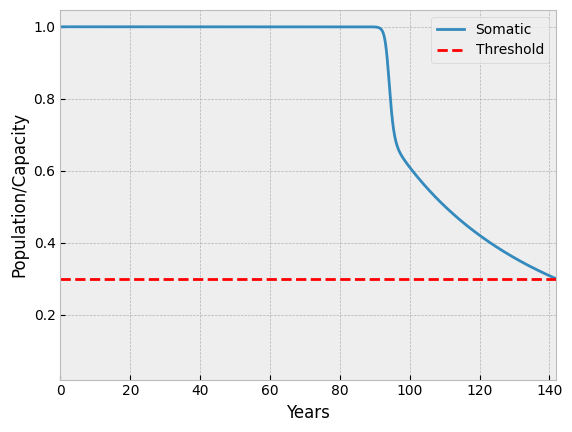

In [11]:
liver_1eq_conf.plot_curves()

Life expectancy (years): 142.0
--------------------------------------------------
No resection
Max derivative value: 509542.0
Max derivative moment: 94.0
Ratio of max derivative to total lifespan in %: 66.0
Max value: 495943141.0
Max moment: 110.0
Ratio of max to total lifespan in %: 77.3


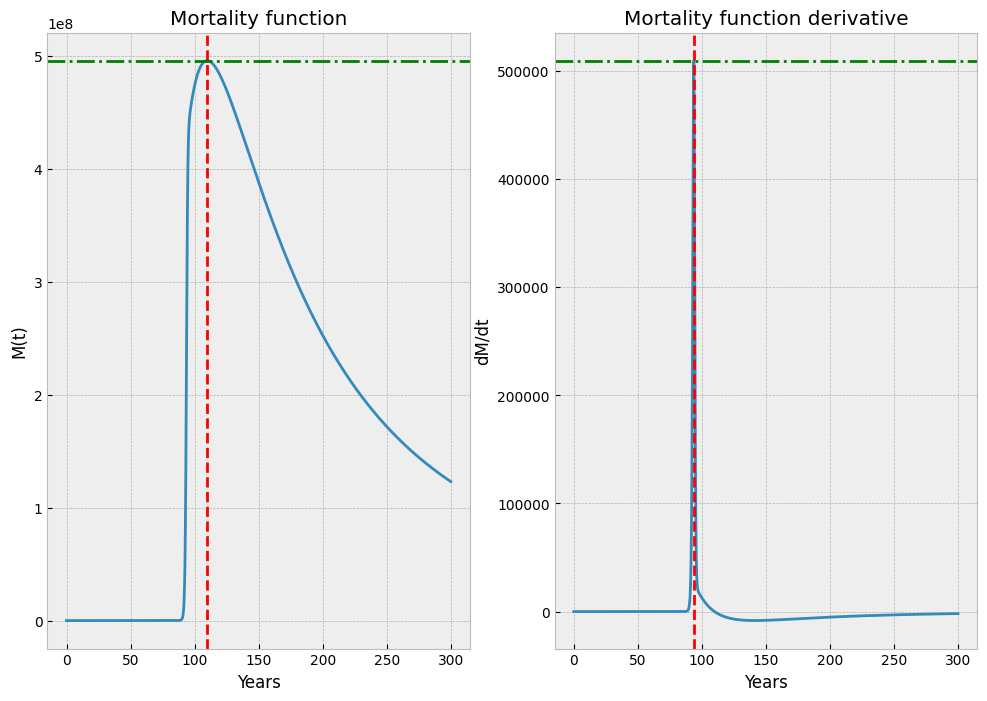

In [12]:
liver_1eq_conf.plot_curves('Mortality function', derivative=True)

Life expectancy (years): 142.0
--------------------------------------------------
No resection
--------------------------------------------------
--------------------------------------------------
Maximum value of mortality function derivative: 509542.0
--------------------------------------------------
Population value for mortality function derivative maximum (proportional to K): 0.9
--------------------------------------------------
Maximum value of mortality function: 495943141.0
--------------------------------------------------
Population value for mortality function maximum (proportional to K): 0.5


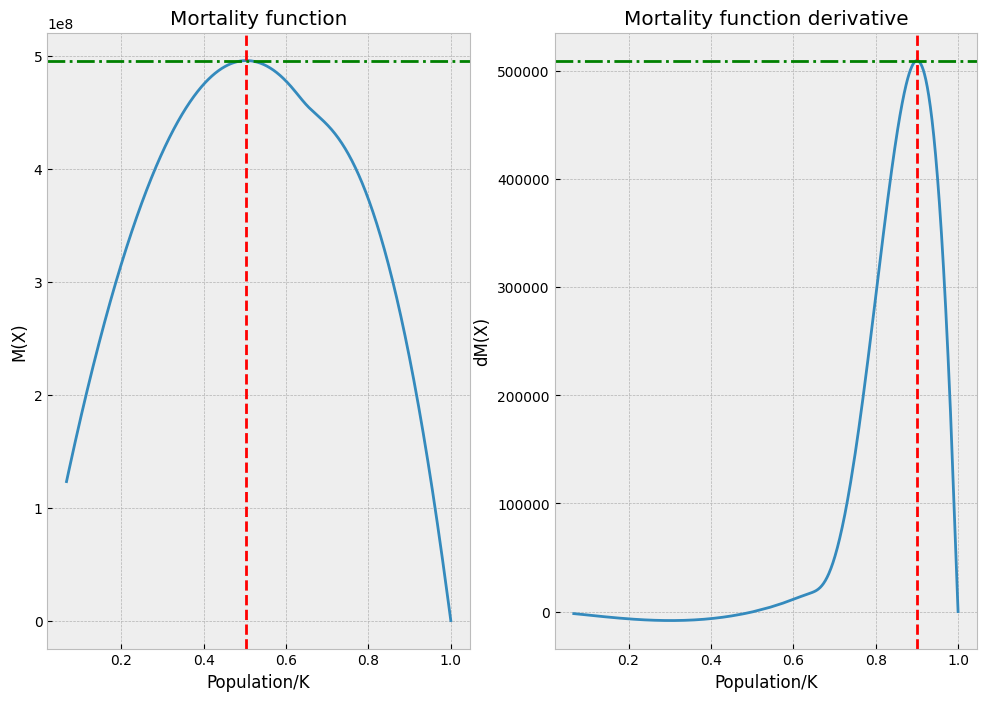

In [13]:
liver_1eq_conf.plot_curves('Mortality phase', derivative=True)

##### We can see that the lifespan hasn't changed, it's still 142 years. Also, mortality function has exactly the same characteristics.

##### Now we can try to include mutants and see what the result will be.

In [14]:
liver_1eq_mut_conf = SomaticLS(organ='liver', include_mutants=True)

Life expectancy (years): 137.0
--------------------------------------------------
No resection


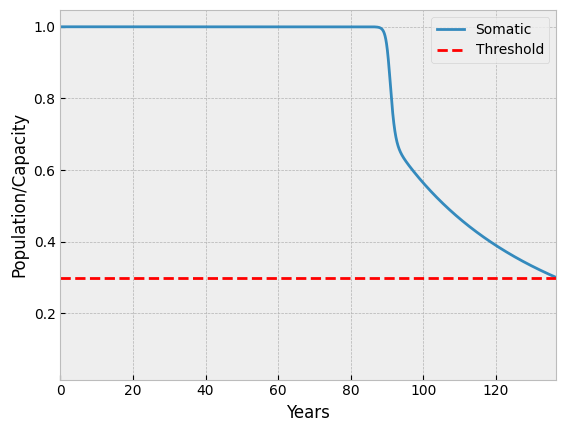

In [15]:
liver_1eq_mut_conf.plot_curves()

Life expectancy (years): 137.0
--------------------------------------------------
No resection


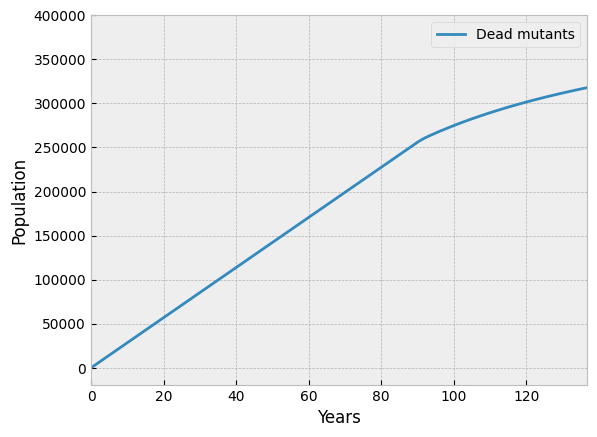

In [16]:
liver_1eq_mut_conf.plot_curves('Dead mutants')

Life expectancy (years): 137.0
--------------------------------------------------
No resection
Max derivative value: 527267.0
Max derivative moment: 90.0
Ratio of max derivative to total lifespan in %: 66.2
Max value: 496121729.0
Max moment: 106.0
Ratio of max to total lifespan in %: 77.3


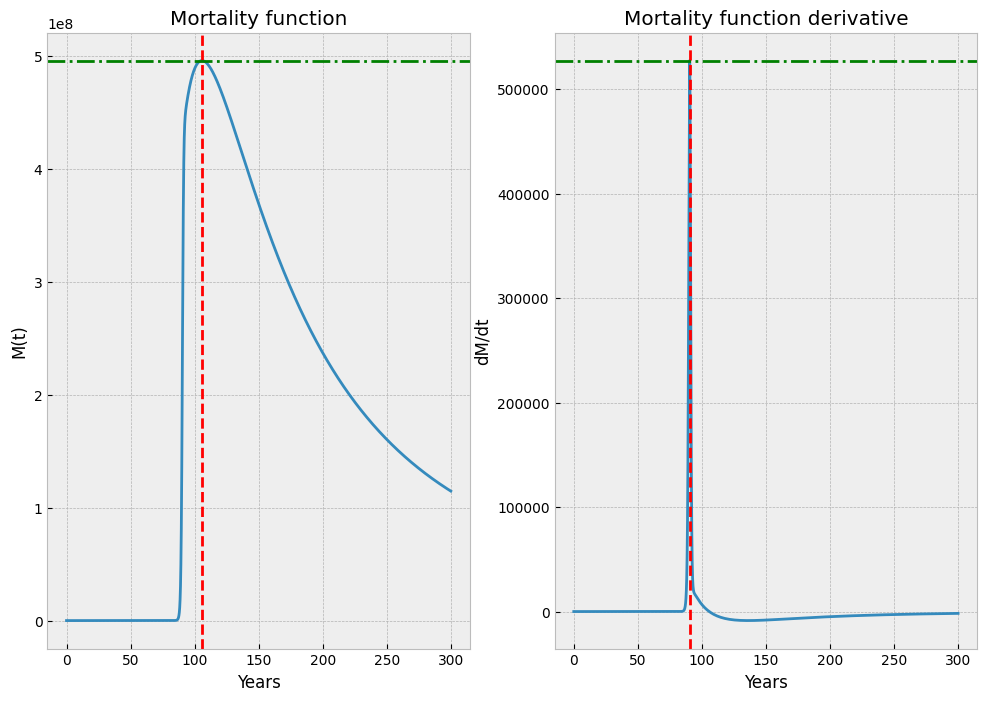

In [17]:
liver_1eq_mut_conf.plot_curves('Mortality function', derivative=True)

Life expectancy (years): 137.0
--------------------------------------------------
No resection
--------------------------------------------------
--------------------------------------------------
Maximum value of mortality function derivative: 527266.0
--------------------------------------------------
Population value for mortality function derivative maximum (proportional to K): 0.9
--------------------------------------------------
Maximum value of mortality function: 496118045.0
--------------------------------------------------
Population value for mortality function maximum (proportional to K): 0.5


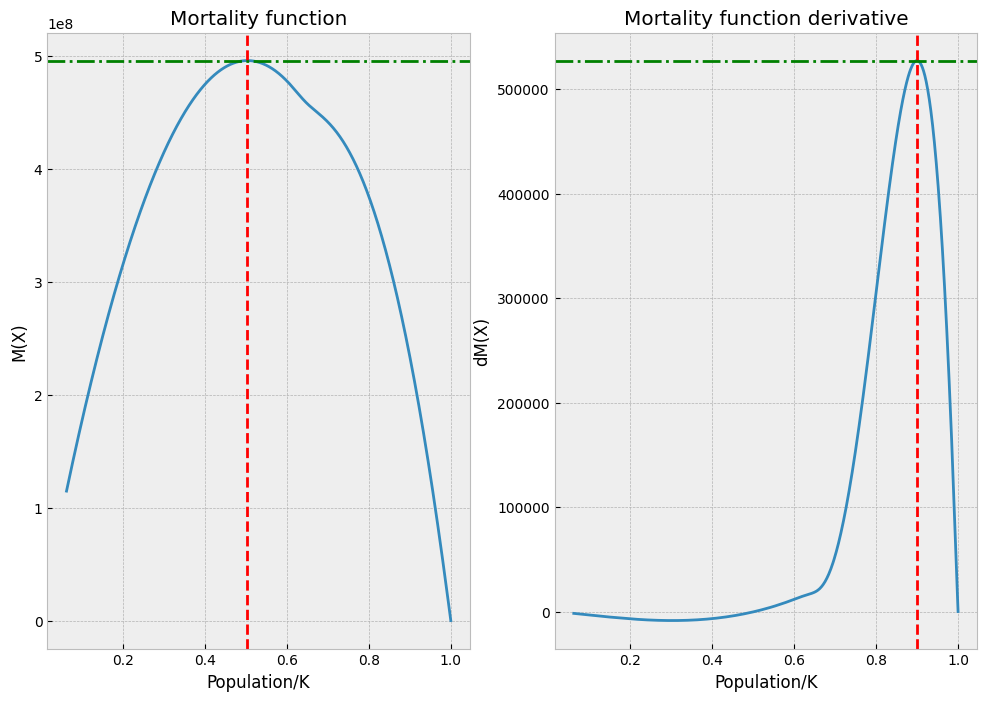

In [18]:
liver_1eq_mut_conf.plot_curves('Mortality phase', derivative=True)

#### We can see that the lifespan has slightly changed compared to situation where there are no alive mutants. The difference is just 5 years for the default set of parameters. We can launch the .variator() with the set ($\sigma, \alpha, z, d$).

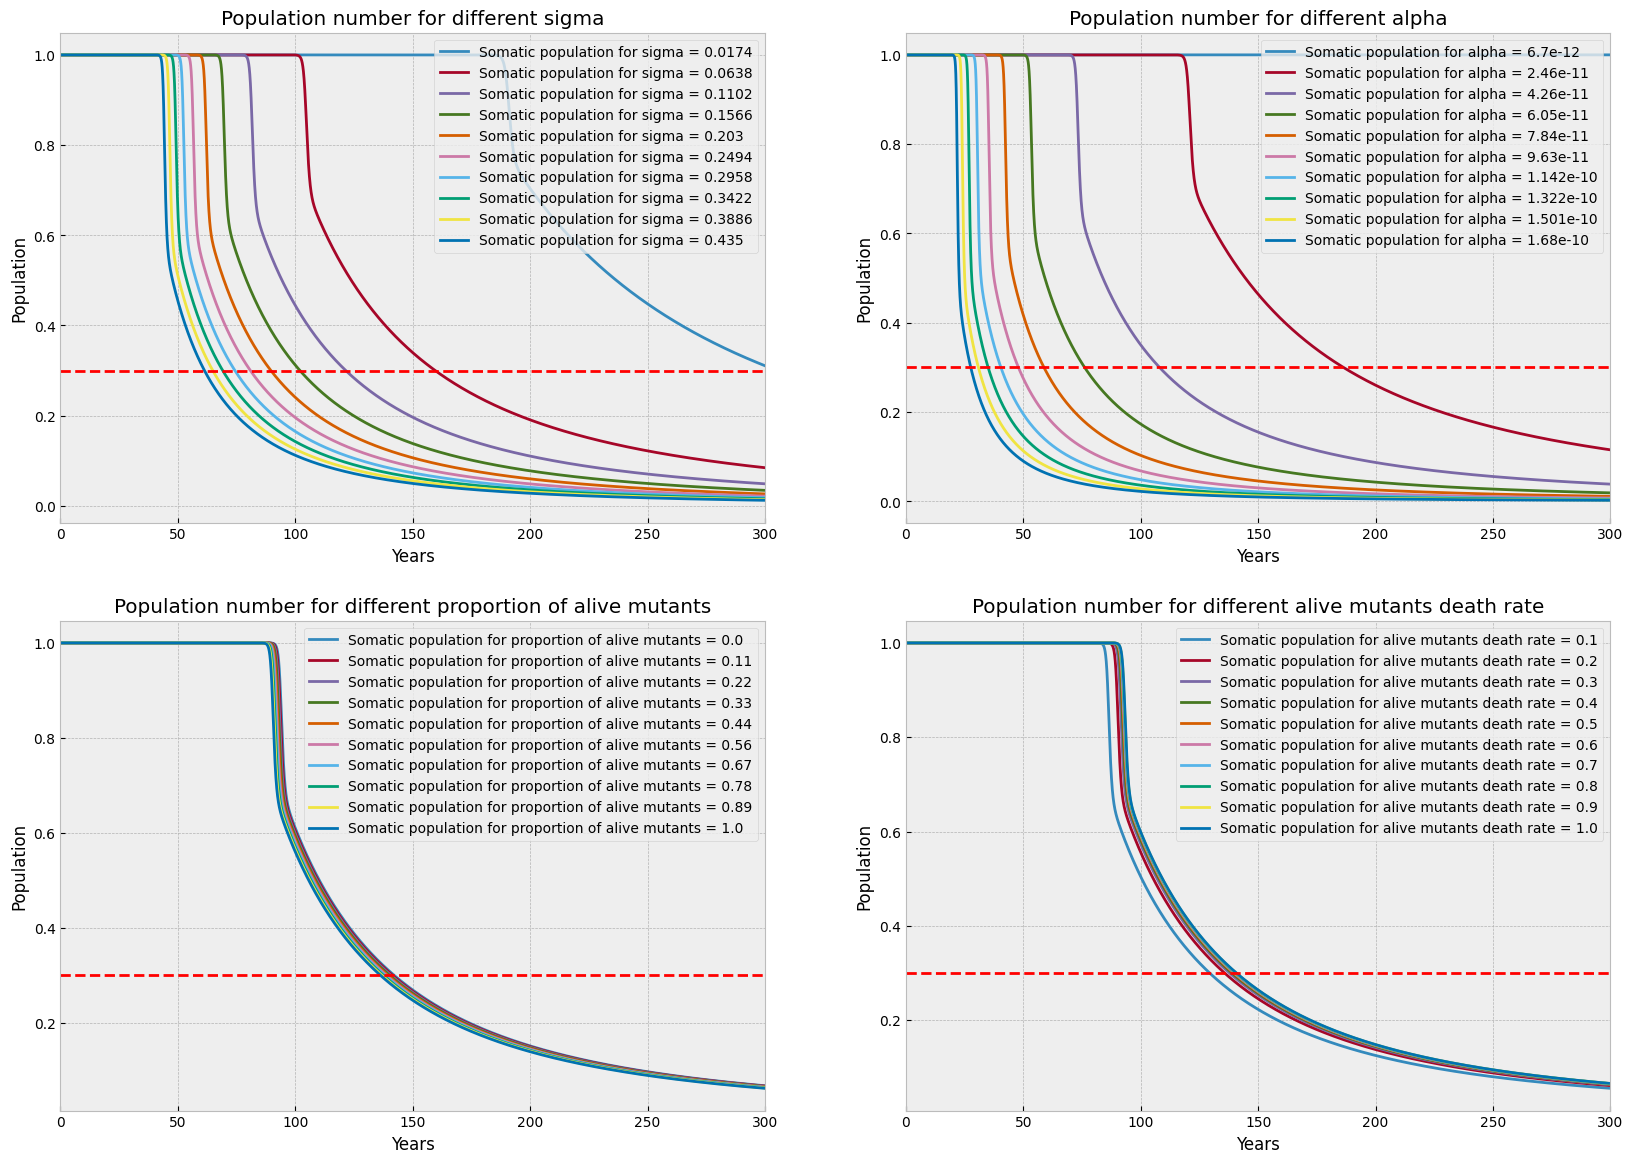

In [19]:
liver_1eq_mut_conf.variator(sampling_freq=10)

##### The results show that z and d parameters have a small influence on the overall lifespan of a somatic population, $\sigma$ and $\alpha$ follow the same 'lifespan limit' pattern as for a two-equation system. We can see that the lower the $d$ value is, the lower the lifespan. 

##### For the Model 1 system without 'alive' mutants we can plot stable points as we have an analytic solution for $\frac{dX}{dt} = 0$

Life expectancy (years): 142.0
--------------------------------------------------
No resection


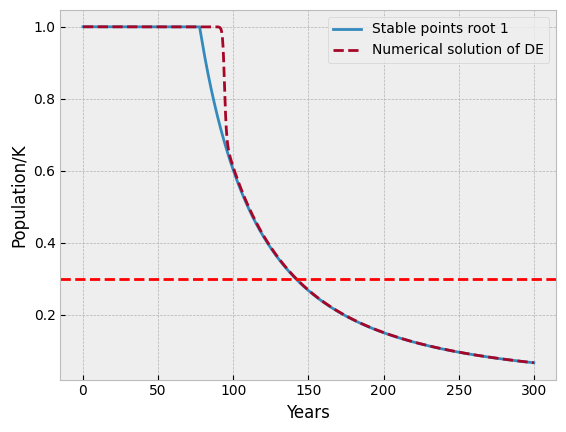

In [20]:
liver_1eq_conf.plot_curves('Stable points')

##### Unfortunately, this quite interesting result takes place only with a liver. We can inspect other organs by overriding costructor with `.restart()` class method. We'll take lungs as an example.

In [21]:
lungs = liver_1eq_conf.restart(organ='lungs', end_time=400, memory=False)

In [22]:
print(lungs)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 400.0 years,
              --type of system: Model one equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


Life expectancy (years): 365.0
--------------------------------------------------
No resection


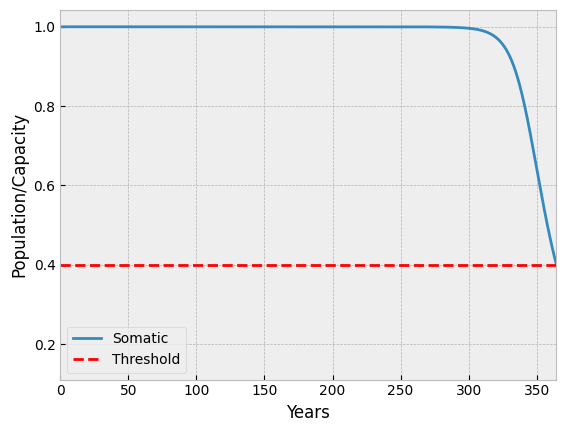

In [23]:
lungs.plot_curves()

Life expectancy (years): 365.0
--------------------------------------------------
No resection


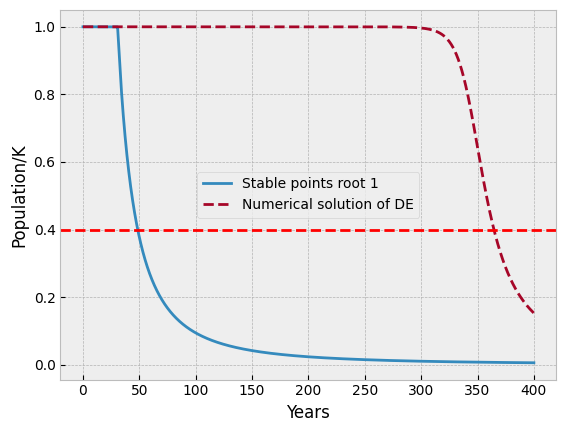

In [24]:
lungs.plot_curves('Stable points')

##### Overall, investigating the `.variator()` output we can say that for such parameter values usage of 'alive' mutants is not necessary. We won't prove it here because it will take a lot of space and time, but you can try it yourself.

# Notes on module

##### We'd like to include some tips about working with `SomaticLS` objects.

## Attributes

##### Attributes of objects are mutable. This means that you can directly modify some parameters of a simulation by calling them. You can access lifespan, population, threshold, parameters and initial conditions in dict-style manner. For example:

In [25]:
sim = SomaticLS()

In [26]:
print(sim['lifespan'], ',\n', sim['threshold'], ',\n', sim['initial'], ',\n', sim['population'].y[0], ',\n', sim['parameters'])

{'Mitosis': 57898, 'Years': 142} ,
 0.3 ,
 {'K': 200000000000.0, 'C': 0, 'F': 0, 'm': 0} ,
 [2.00000000e+11 2.00000000e+11 2.00000000e+11 ... 1.34004702e+10
 1.34002509e+10 1.34000315e+10] ,
 {'sigma': 0.087, 'K': 200000000000.0, 'M': 2127659.574468085, 'r': 0.009828009828009828, 'eps': 0.064, 'alpha': 3.36e-11, 'beta': 1.7568e-11, 'g': 0.009828009828009828, 'z': 0, 'theta': 0}


##### If you want to change it you can just set the new value.

Life expectancy (years): 142.0
--------------------------------------------------
No resection


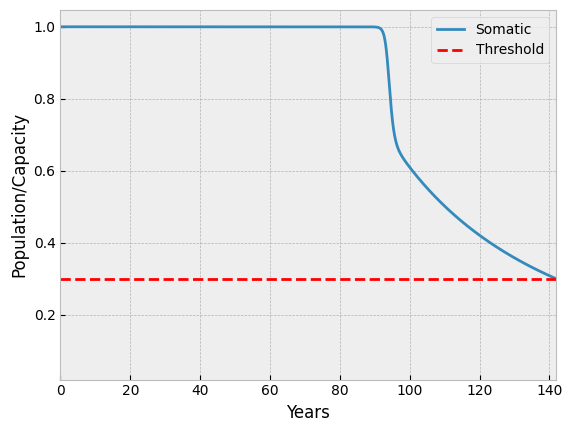

In [27]:
sim.plot_curves()

Life expectancy (years): 142.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


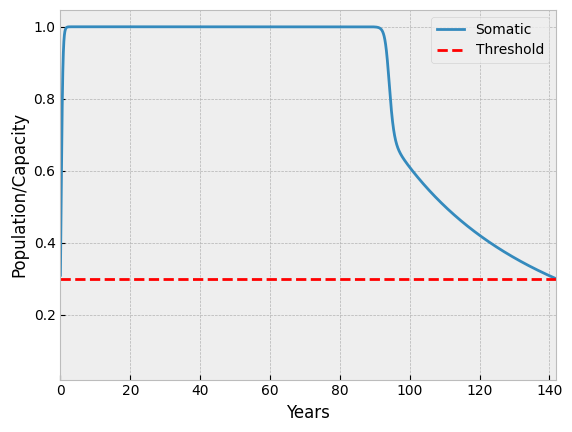

In [28]:
sim['initial']['K'] = 0.31*sim['parameters']['K']
sim.plot_curves()

##### So, now we can see that our initial conditions have changed. Also, there is `is dead` parameter that can show if this organ is dead by the end of a simulation.

In [29]:
sim = sim.restart(end_time=100)
sim1 = sim.restart(end_time=150)

print('sim:',sim['is dead'], '\n', 'sim1:', sim1['is dead'], '\n', 'lifespan:', int(sim1['lifespan']['Years']))

sim: False 
 sim1: True 
 lifespan: 142


##### We can also compare two objects between each other. The lifespans will be compared:

In [30]:
sim_lungs = sim.restart(organ='lungs', end_time=400)
sim_liver = sim.restart()

In [31]:
sim_liver < sim_lungs

True

## Custom input

##### If you want to make a custom simulation without using pre-defined config, you can import your file in multiple ways: 
- pandas DataFrame
- .json file
- excel or csv file
- python dict

##### For custom config you should specify it in the constructor of your class with `custom_conf` parameter.

##### For example we will try csv file, pandas df and dict with dummy values.

##### Note that you'll need to specify your custom organ name, otherwise liver parameters will be specified.

In [32]:
import pandas as pd

In [33]:
dic = {
    'parameters':{
    'K':1.,
    'M':1.,
    'alpha':1.,
    'beta':1.,
    'sigma':0,
    'r':0,
    'g':0,
    'z':0,
    'theta':0,
    'eps':0
    },
    'initial conditions':{'K':0.31,'M':0.31, 'm':0},
    'threshold':0.3
}

path = './project_mutations/data.csv'
path_json = './project_mutations/config.json'

df = pd.read_csv(path).set_index('Unnamed: 0')

In [34]:
df

,parameters,initial conditions,threshold
Unnamed: 0,,,
K,1.0,0.31,0.3
M,1.0,0.31,NaN
alpha,1.0,NaN,NaN
beta,1.0,NaN,NaN
sigma,0.0,NaN,NaN
eps,0.0,NaN,NaN
r,0.0,NaN,NaN
g,0.0,NaN,NaN
z,0.0,NaN,NaN


In [35]:
sim_dic = SomaticLS(organ='c', equation='two', custom_conf=dic)
sim_path = SomaticLS(organ='c', equation='two', custom_conf=path)
sim_df = SomaticLS(organ='c', equation='two', custom_conf=df)
sim_json = SomaticLS(organ='c', equation='two', custom_conf=path_json)

This organ is not specified. Use your custom config to solve the system
This organ is not specified. Use your custom config to solve the system
This organ is not specified. Use your custom config to solve the system
This organ is not specified. Use your custom config to solve the system


In [36]:
print(sim_dic)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: c,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model two equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


Haven't died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.01


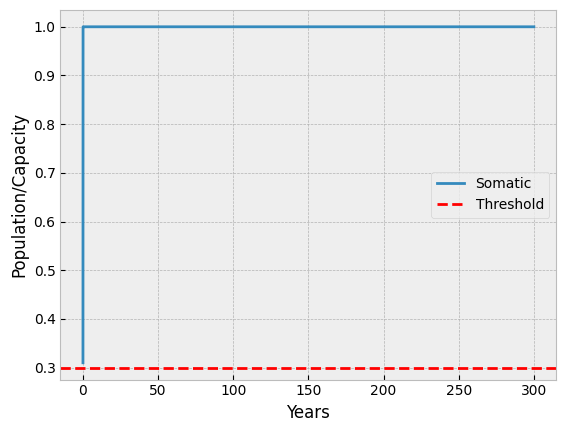

In [37]:
sim_path.plot_curves()

Haven't died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.01


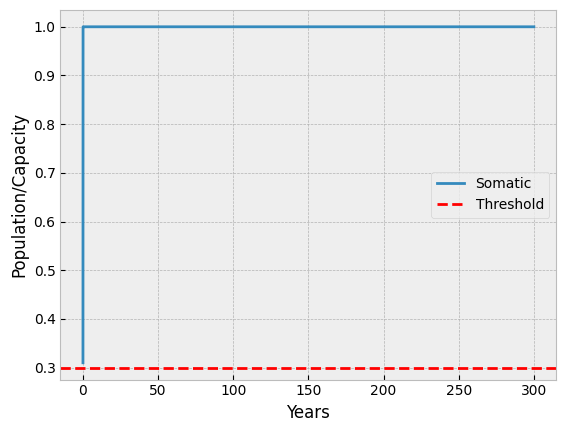

In [38]:
sim_dic.plot_curves()

Haven't died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.01


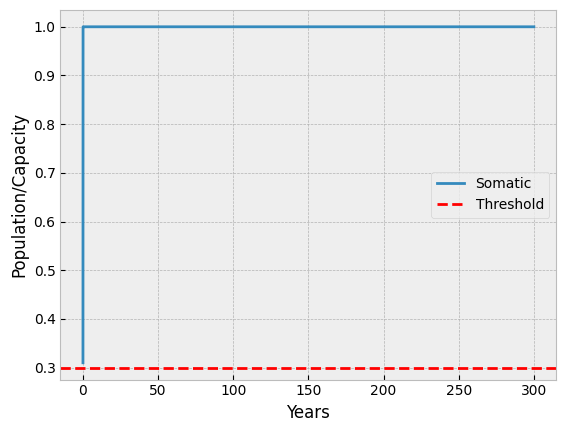

In [39]:
sim_df.plot_curves()

Haven't died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.01


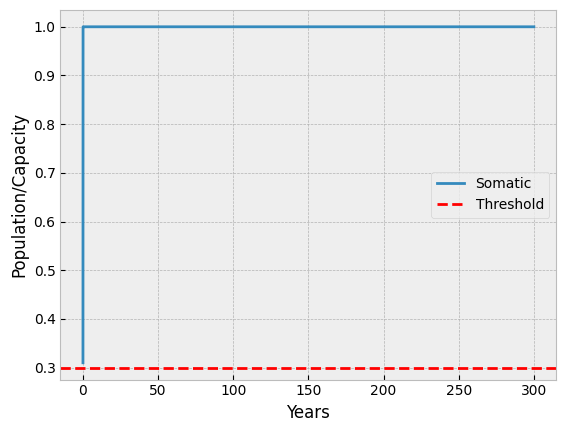

In [40]:
sim_json.plot_curves()

##### All three files had exactly the same values. Note that to import custom df or path to a excel or csv we have to specify every single parameter and variable name that we'll use in simulation.

##### This variant can be useful if you need to specify a lot of parameters at once. If you need to change only one attribute you can do it directly.

## Restart method

##### You can also 'restart' your simulation with different parameters without calling SomaticLS constructor directly. This can be achieved with a `.restart` method. It recieves **kwargs** for an instance initialisation and **memory** bool flag For example:

In [47]:
sim = SomaticLS()
print('Before restart:', sim)

sim = sim.restart(organ='lungs')
print('After restart:', sim)

Before restart: 
              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: liver,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model one equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              
After restart: 
              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model one equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


##### By default **memory** parameter is False. If we'll set it to true, method will change only specified parameters without calling the constructor. Note that this method outputs NoneType object, so, you can't make an instance with it, just change the one you have:

In [48]:
print(sim)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model one equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


In [51]:
sim.restart(method='RK45', memory=True)
print(sim)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: Model one equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


##### As we can see, we save the previous parameters and change only what we specify.